# Ponovitev

Prvo predavanje.... Glavna stvar je **Ponovitev znanja**

Se gre čez konkreten primer in ponovi znanje o analitiki podatkov..

Cilj delavnice je sprocesiranje in analiza < DATASETA >

Analizirali bomo podatke o SAT rezultatih na srednjih šolah v New York-u.

SAT je standardizirani test (kot naša matura). Test opravijo vsi srednješolci in na podlagi rezultata se univerze odločajo glede sprejema oziroma zavrnitve vpisa študenta.

Vprašanja kera imamo so:
* Ali so bolj uspešni razredi z več ali z manj otroki.
* Kateri kriteriji korelirajo z SAT rezultati
* * ell_per - English language learners - procent otrok v razredu, ki se uči angleški jezik
* * white_per - procent belih otrok
* * black_per - procent črnih otrok
* * asian_per - procent azijskih otrok
* * hispanic_per - procent južnoameriških otrok

## Uvoz podatkov

sat_results_2012.csv hrani podatke o doseženih SAT rezultatih v letu 2012
> V letu 2012 je bil test sestavljen iz 3 sklopov: "Critical readig", "Math" ,"Writing". Vsak sklop je bil vreden od 0 do 800 točk, skupaj 2400 točk.


class_size_2010_2011.csv hrani podatke o velikosti razredov šol v letih 2010/2011 (ni ista letnica, vendar bomo operirali s temi podatki).
> 9-12 razred pri njih pomeni High School

demographics_2006_2012.csv hrani podatke o sestavi razredo od leta 2006 do 2012.

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Uvozite podatke. 
</div>

In [2]:
import pandas as pd

sat_results = pd.read_csv("datasets/NYE_SAT_scores_Predavanje_01/sat_results_2012.csv", delimiter=";")
class_size = pd.read_csv("datasets/NYE_SAT_scores_Predavanje_01/class_size_2010_2011.csv", delimiter=";")
demographics = pd.read_csv("datasets/NYE_SAT_scores_Predavanje_01/demographics_2006_2012.csv")

## Cleaning datasets

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Preglejte sat_results dataset.
Prikažite prvih 10 vrstic in izpišite osnovne informacije o datasetu (imena stolpcev, število vrstic, datatip stolpca)
</div>


In [3]:
sat_results.head(10)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387


In [4]:
sat_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
    Ustvarite nov stolpec <i>SAT Avg. Score</i> in vanj shranite seštevek vseh treh stolpcev.
Vrstice z nepravilnimi vrednostmi odstranite.
</div>


In [5]:
#najprej pretvorimo objecte v številčne vrednosti

for col in ["SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score"]:
    sat_results[col] = pd.to_numeric(sat_results[col], errors="coerce")
    #coerce ga prisili da izvede zadevo, ampak zapiše NaN kjer ne more pretvorit v številko.
    print(f"Obdelujemo stolpec {col}")
    print(f"Imamo {sat_results[col].isnull().sum()} NaN vrednosti.")
    print()
sat_results.info()

Obdelujemo stolpec SAT Critical Reading Avg. Score
Imamo 57 NaN vrednosti.

Obdelujemo stolpec SAT Math Avg. Score
Imamo 57 NaN vrednosti.

Obdelujemo stolpec SAT Writing Avg. Score
Imamo 57 NaN vrednosti.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              478 non-null    object 
 1   SCHOOL NAME                      478 non-null    object 
 2   Num of SAT Test Takers           478 non-null    object 
 3   SAT Critical Reading Avg. Score  421 non-null    float64
 4   SAT Math Avg. Score              421 non-null    float64
 5   SAT Writing Avg. Score           421 non-null    float64
dtypes: float64(3), object(3)
memory usage: 22.5+ KB


In [6]:
sat_results[sat_results["SAT Critical Reading Avg. Score"].isnull()].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
22,02M392,MANHATTAN BUSINESS ACADEMY,s,NaN,NaN,NaN
23,02M393,BUSINESS OF SPORTS SCHOOL,s,NaN,NaN,NaN
25,02M399,THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,s,NaN,NaN,NaN
38,02M427,MANHATTAN ACADEMY FOR ARTS & LANGUAGE,s,NaN,NaN,NaN
40,02M437,HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES,s,NaN,NaN,NaN


In [7]:
sat_results = sat_results[sat_results["SAT Critical Reading Avg. Score"].notnull()]

sat_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              421 non-null    object 
 1   SCHOOL NAME                      421 non-null    object 
 2   Num of SAT Test Takers           421 non-null    object 
 3   SAT Critical Reading Avg. Score  421 non-null    float64
 4   SAT Math Avg. Score              421 non-null    float64
 5   SAT Writing Avg. Score           421 non-null    float64
dtypes: float64(3), object(3)
memory usage: 23.0+ KB


In [8]:
sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0


In [9]:
sat_results["SAT Avg. Score"] = sat_results["SAT Critical Reading Avg. Score"] + sat_results["SAT Math Avg. Score"] + sat_results["SAT Writing Avg. Score"]

sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [10]:
sat_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 477
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              421 non-null    object 
 1   SCHOOL NAME                      421 non-null    object 
 2   Num of SAT Test Takers           421 non-null    object 
 3   SAT Critical Reading Avg. Score  421 non-null    float64
 4   SAT Math Avg. Score              421 non-null    float64
 5   SAT Writing Avg. Score           421 non-null    float64
 6   SAT Avg. Score                   421 non-null    float64
dtypes: float64(4), object(3)
memory usage: 26.3+ KB


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Izpišite prvih 5 vrstica class_size dataseta in izpišite osnovne informacije.</div>

In [11]:
class_size.head(5)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15,1.0,15.0,15.0,15.0,ATS,NaN


In [12]:
class_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   27611 non-null  int64  
 1   BOROUGH                               27611 non-null  object 
 2   SCHOOL CODE                           27611 non-null  object 
 3   SCHOOL NAME                           27611 non-null  object 
 4   GRADE                                 26127 non-null  object 
 5   PROGRAM TYPE                          26127 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  26127 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   26127 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           26127 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     26127 non-null  object 
 10  NUMBER OF SECTIONS                    26127 non-null  float64
 11  AVERAGE CLASS S

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
V class_size datasetu obdržite le vrstice, ki se nanašajo na High School (vrednost 09-12 v GRADE stolpcu).
</div>

In [13]:
class_size["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

In [14]:
filter_ = class_size["GRADE "] == "09-12"
class_size = class_size[filter_]

In [15]:
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63,3.0,21.0,19.0,25.0,STARS,NaN
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79,3.0,26.3,24.0,31.0,STARS,NaN
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38,2.0,19.0,16.0,22.0,STARS,NaN
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69,3.0,23.0,13.0,30.0,STARS,NaN
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53,3.0,17.7,16.0,21.0,STARS,NaN


In [16]:
class_size["GRADE "].value_counts()

09-12    10644
Name: GRADE , dtype: int64

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Da bomo kasneje združili class_size in sat_results dataseta potrebujemo edinstven ključ po katerem ju bomo združili. Ta ključ je vrednost DBN (identifikacijska številka šole). DBN vrednosti v class_sizes ni, vendar pa jo lahko ustvarimo s pomočjo CSD in SCHOOL CODE stolpcev.
    
CSD vrednost mora biti 2-mestna številka kateri nato dodamo SCHOOL CODE.
</div>

In [253]:
#class_size["CSD"] = class_size.CSD.map("{:02}".format")
#moje, ne dela

In [17]:
def zero_padded(x):
    return f"{x:02}" # to nam da dvomestno številko, ampak kot string.

class_size["CSD_padded"] = class_size["CSD"].apply(zero_padded)
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,CSD_padded
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63,3.0,21.0,19.0,25.0,STARS,NaN,01
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79,3.0,26.3,24.0,31.0,STARS,NaN,01
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38,2.0,19.0,16.0,22.0,STARS,NaN,01
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69,3.0,23.0,13.0,30.0,STARS,NaN,01
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53,3.0,17.7,16.0,21.0,STARS,NaN,01


In [18]:
class_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10644 entries, 225 to 27609
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CSD                                   10644 non-null  int64  
 1   BOROUGH                               10644 non-null  object 
 2   SCHOOL CODE                           10644 non-null  object 
 3   SCHOOL NAME                           10644 non-null  object 
 4   GRADE                                 10644 non-null  object 
 5   PROGRAM TYPE                          10644 non-null  object 
 6   CORE SUBJECT (MS CORE and 9-12 ONLY)  10644 non-null  object 
 7   CORE COURSE (MS CORE and 9-12 ONLY)   10644 non-null  object 
 8   SERVICE CATEGORY(K-9* ONLY)           10644 non-null  object 
 9   NUMBER OF STUDENTS / SEATS FILLED     10644 non-null  object 
 10  NUMBER OF SECTIONS                    10644 non-null  float64
 11  AVERAGE CLASS

In [19]:
class_size['DBN'] = class_size['CSD_padded'] + class_size["SCHOOL CODE"]

class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,CSD_padded,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [20]:
class_size["PROGRAM TYPE"].value_counts()

GEN ED     6513
CTT        2953
SPEC ED    1178
Name: PROGRAM TYPE, dtype: int64

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
V class_size datasetu imamo tudi več različnih programov poučevanja. Za naše potrebe želimo obdržati le GEN ED program.
</div>

In [21]:
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,CSD_padded,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
V class_size še vedno nimamo edinstvenega ključa, saj je vsak razred prikazan kot svoja vrstica.
    
Ustvarite nov DataFrame, ki ima stolpca "DBN" in "AVERAGE CLASS SIZE".
DBN naj ima "unique" DBN vrednost, AVERAGE CLASS SIZE pa pridobite tako, da vzemete vse povprečne velikosti razredov za isto šolo in pridobite povprečno vrednost.

Pomagate si lahko s funckijo <i>groupby()</i>
</div>

In [22]:
class_size_groupby = class_size.groupby("DBN")
class_size_groupped = class_size_groupby["AVERAGE CLASS SIZE"].mean()
class_size_groupped = class_size_groupped.reset_index() #vzame index in ga pretvori v stolpec

class_size_groupped.head()

,DBN,AVERAGE CLASS SIZE
0,01M292,22.564286
1,01M332,22.000000
2,01M378,33.000000
3,01M448,22.231250
4,01M450,21.200000


In [23]:
class_size_groupped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DBN                 583 non-null    object 
 1   AVERAGE CLASS SIZE  583 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.2+ KB


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Združite sat_results in novo pridobljen dataframe, tako da obdržite vrstice, ki imajo ne-nično vrednost. Prikažite v grafu odvisnost SAT rezultatov od povprečne velikosti razreda.
</div>

In [24]:
sat_results.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [25]:
df = sat_results.merge(class_size_groupped, how="inner", on="DBN")

df.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score,AVERAGE CLASS SIZE
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,22.564286
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,22.231250
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,21.200000
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,23.000000
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,23.571429


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DBN                              401 non-null    object 
 1   SCHOOL NAME                      401 non-null    object 
 2   Num of SAT Test Takers           401 non-null    object 
 3   SAT Critical Reading Avg. Score  401 non-null    float64
 4   SAT Math Avg. Score              401 non-null    float64
 5   SAT Writing Avg. Score           401 non-null    float64
 6   SAT Avg. Score                   401 non-null    float64
 7   AVERAGE CLASS SIZE               401 non-null    float64
dtypes: float64(5), object(3)
memory usage: 28.2+ KB


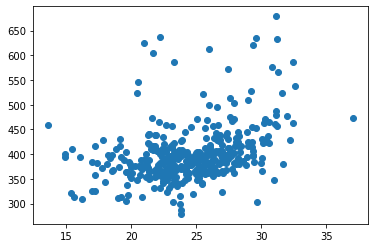

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df["AVERAGE CLASS SIZE"], df["SAT Critical Reading Avg. Score"])
plt.show()

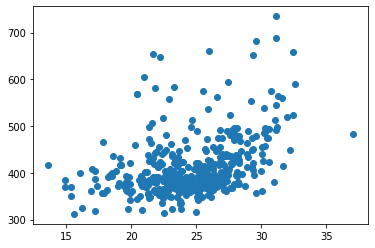

In [28]:
plt.scatter(df["AVERAGE CLASS SIZE"], df["SAT Math Avg. Score"])
plt.show()

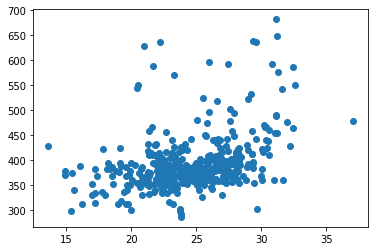

In [29]:
plt.scatter(df["AVERAGE CLASS SIZE"], df["SAT Writing Avg. Score"])
plt.show()

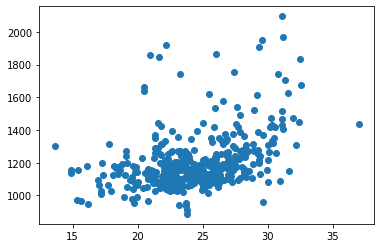

In [30]:
plt.scatter(df["AVERAGE CLASS SIZE"], df["SAT Avg. Score"])
plt.show()

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Poglejmo si še demographics dataframe.

V demographics datafram-u obdržite le vrstice za šolsko leto 20112012</div>

In [31]:
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [272]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DBN                10075 non-null  object 
 1   Name               10075 non-null  object 
 2   schoolyear         10075 non-null  int64  
 3   fl_percent         8560 non-null   object 
 4   frl_percent        4482 non-null   float64
 5   total_enrollment   10075 non-null  int64  
 6   prek               4712 non-null   object 
 7   k                  5882 non-null   object 
 8   grade1             5881 non-null   object 
 9   grade2             5851 non-null   object 
 10  grade3             5779 non-null   object 
 11  grade4             5741 non-null   object 
 12  grade5             5777 non-null   object 
 13  grade6             4517 non-null   object 
 14  grade7             4203 non-null   object 
 15  grade8             4085 non-null   object 
 16  grade9             397

In [32]:
filter_ = demographics["schoolyear"] == 20112012 #schoolyear je številka, zato ne smemo dat narekovajev
demographics = demographics[filter_]

demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [33]:
demographics["schoolyear"].unique()

array([20112012])

<div class="alert alert-block alert-info">
<b>Naloga: </b> 
Združite sat_results in demographics dataframes in obdržite le vrstice, ki imajo ne-nične vrednosti.</div>

In [34]:
df2 = sat_results.merge(demographics, how="inner", on="DBN")

df2.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score,Name,schoolyear,fl_percent,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,NaN,...,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,20112012,NaN,...,89,22.6,181,45.9,9,2.3,226.0,57.4,168.0,42.6
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HIGH SCHOOL,20112012,NaN,...,143,23.9,331,55.4,62,10.4,327.0,54.7,271.0,45.3
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,SATELLITE ACADEMY HS @ FORSYTHE STREET,20112012,NaN,...,77,34.4,133,59.4,8,3.6,97.0,43.3,127.0,56.7
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,MARTA VALLE SECONDARY SCHOOL,20112012,NaN,...,116,31.6,209,56.9,6,1.6,170.0,46.3,197.0,53.7


<div class="alert alert-block alert-info">
<b>Naloga: </b> 
    Ustvarite korelacijsko matriko (<i> .corr()</i> ) in jo prikažite v obliki "heatmap". Uporabite stolpce:
    
    white_per, 
    black_per, 
    asian_per, 
    hispanic_per, 
    ell_per (english language learners), 
    male_per, 
    female_per
</div>

In [37]:
df2.drop(columns=['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
                 'Name', 'schoolyear', 'fl_percent', 'frl_percent', 
                 'total_enrollment', 'prek', 'k', 'grade1', 'grade2',
                 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 
                 'grade8', 'grade9', 'grade10', 'grade11', 'grade12', 
                 'ell_num', 'sped_num', 'sped_percent', 'ctt_num',
                 'selfcontained_num', 'asian_num', 'black_num', 
                 'hispanic_num','white_num', 'male_num', 'female_num',])

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score,ell_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
0,355.0,404.0,363.0,1122.0,22.3,14.0,29.1,53.8,1.7,61.4,38.6
1,383.0,423.0,366.0,1172.0,21.1,29.2,22.6,45.9,2.3,57.4,42.6
2,377.0,402.0,370.0,1149.0,5.0,9.7,23.9,55.4,10.4,54.7,45.3
3,414.0,401.0,359.0,1174.0,4.0,2.2,34.4,59.4,3.6,43.3,56.7
4,390.0,433.0,384.0,1207.0,11.2,9.3,31.6,56.9,1.6,46.3,53.7
...,...,...,...,...,...,...,...,...,...,...,...
407,348.0,353.0,334.0,1035.0,18.2,0.5,28.3,68.7,1.8,48.4,51.6
408,342.0,364.0,354.0,1060.0,23.9,1.5,26.4,70.4,1.0,54.5,45.5
409,428.0,465.0,422.0,1315.0,2.7,5.3,12.9,79.5,1.5,52.1,47.9
410,347.0,358.0,350.0,1055.0,18.2,0.9,21.2,77.3,0.0,53.2,46.8


In [38]:
df2.corr()

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score,schoolyear,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
SAT Critical Reading Avg. Score,1.000000,0.882200,0.973012,0.976942,NaN,-0.738180,0.326423,-0.227746,-0.477656,0.035994,...,0.053467,-0.226208,0.011152,-0.366948,0.420274,0.626583,0.284782,-0.122928,0.350269,0.122970
SAT Math Avg. Score,0.882200,1.000000,0.895630,0.956405,NaN,-0.646500,0.429602,0.026045,-0.211639,0.087645,...,0.027420,-0.387669,0.106054,-0.350294,0.467138,0.622027,0.406207,-0.025272,0.426617,0.025328
SAT Writing Avg. Score,0.973012,0.895630,1.000000,0.982189,NaN,-0.723312,0.337081,-0.199143,-0.427277,0.034891,...,0.029113,-0.278918,0.018774,-0.341496,0.444664,0.651950,0.286928,-0.161909,0.369533,0.161959
SAT Avg. Score,0.976942,0.956405,0.982189,1.000000,NaN,-0.721103,0.377844,-0.130958,-0.376445,0.055810,...,0.037253,-0.310319,0.049165,-0.363118,0.458223,0.651927,0.338876,-0.103465,0.395345,0.103516
schoolyear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frl_percent,-0.738180,-0.646500,-0.723312,-0.721103,NaN,1.000000,-0.336475,0.132250,0.415554,-0.159710,...,-0.152557,0.057769,0.025371,0.545697,-0.507835,-0.710415,-0.296846,0.062587,-0.357445,-0.062589
total_enrollment,0.326423,0.429602,0.337081,0.377844,NaN,-0.336475,1.000000,0.563777,-0.042815,0.802425,...,0.548233,-0.271698,0.719486,-0.160492,0.710850,0.362292,0.971007,0.061660,0.965186,-0.061630
ell_num,-0.227746,0.026045,-0.199143,-0.130958,NaN,0.132250,0.563777,1.000000,0.608759,0.503376,...,0.195731,-0.360752,0.641918,0.167799,0.248982,0.035709,0.569545,0.116829,0.519952,-0.116802
ell_percent,-0.477656,-0.211639,-0.427277,-0.376445,NaN,0.415554,-0.042815,0.608759,1.000000,-0.101724,...,-0.212506,-0.367061,0.124947,0.364454,-0.091845,-0.146719,-0.021904,0.117713,-0.062846,-0.117691
sped_num,0.035994,0.087645,0.034891,0.055810,NaN,-0.159710,0.802425,0.503376,-0.101724,1.000000,...,0.540186,-0.159492,0.757817,-0.013100,0.551586,0.224926,0.794143,0.143174,0.758094,-0.143155


In [39]:
import seaborn as sns

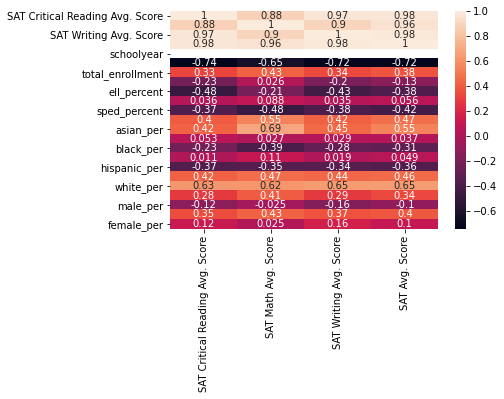

In [40]:
sns.heatmap(df2.corr()[["SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score",
                       "SAT Avg. Score"]], annot=True)
plt.show()